In [1]:
import argparse
from datetime import datetime
# from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
import os.path
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

matplotlib.rcParams.update({"figure.facecolor": "white"})

## Color Selection

(0.0, 3.0, 0.0, 9.0)

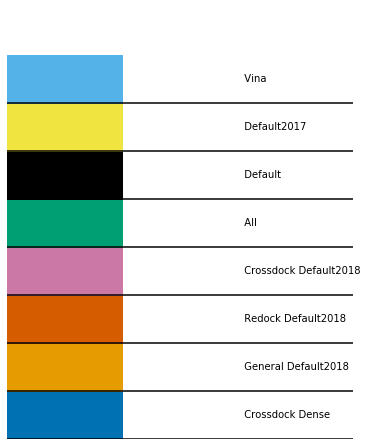

In [124]:
import matplotlib.patches as mpatch
color_dict = {'Crossdock Dense':'#0071b2','General Default2018':'#e59c00',
              'Redock Default2018':'#d65c00','Crossdock Default2018': '#cc78a6',
               'All':'#009e73','Default':'#000000',
               'Default2017':'#efe440','Vina':'#55b2e8'
              }
fig = plt.figure(figsize=[4.8, 6])
ax = fig.add_axes([0, 0, 1, 1])
for j, (name, c) in enumerate(color_dict.items()):
    weight = None

    r1 = mpatch.Rectangle((0, j), 1, 1, color=c)
    txt = ax.text(2, j+.5, '  ' + name, va='center', fontsize=10,
                  weight=weight)
    ax.add_patch(r1)
    ax.axhline(j, color='k')

ax.set_xlim(0, 3)
ax.set_ylim(0, j + 2)
ax.axis('off')

### Prettify Stuff
All of this is for bar graphs, if we are doing them

In [131]:
use_pose=[1,3]
annotate_size=4
width=1

#### Get y-limit of the two graphs

In [132]:
def get_ylim(all_data):
    ylim=[100,0]
    for data in all_data:
        minimum_data = data.min().min()
        maximum_data = data.max().max()
        if minimum_data < ylim[0]:
            ylim[0] = minimum_data
        if maximum_data > ylim[1]:
            ylim[1] = maximum_data
    ylim[0] = np.floor(ylim[0])
    ylim[1] = np.ceil(ylim[1])
    return ylim

## For non sweep figures

In [133]:
def get_linestyle(column_name):
    if 'Ensemble' in column_name:
        linestyle = '-'
    elif 'Vina' == column_name:
        linestyle = (0, (3, 1, 1, 1))
    else:
        linestyle = '--'
    return linestyle

In [180]:
def get_linewidth(column_name):
    if 'Vina' == column_name:
        linewidth = 5
    elif 'Refine' in column_name:
        linewidth = 5
    else:
        linewidth = 2
    return linewidth

In [135]:
xlab='Top Number of Poses'
ylab =r'Percent Systems with RMSD$<2\,\AA$(Cumulative)'
xlim=1

### Compare Rescore to Refine

In [196]:
filename='rescore_vs_refine.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

rescore_vs_refine_line


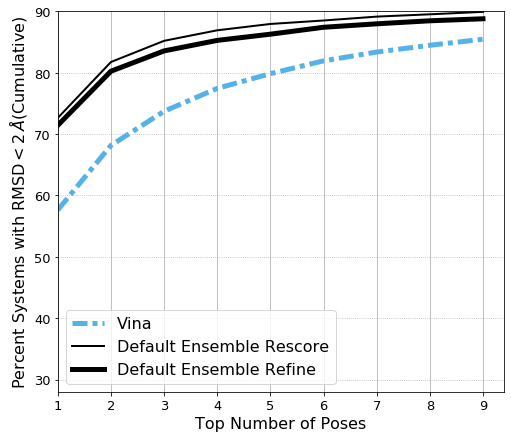

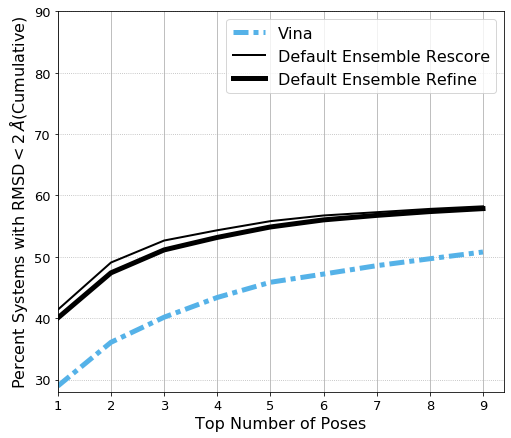

In [197]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','').replace(' Rescore','').replace(' Refine','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [198]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### First single models

In [8]:
filename='rescore_single_models.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

rescore_single_models_line


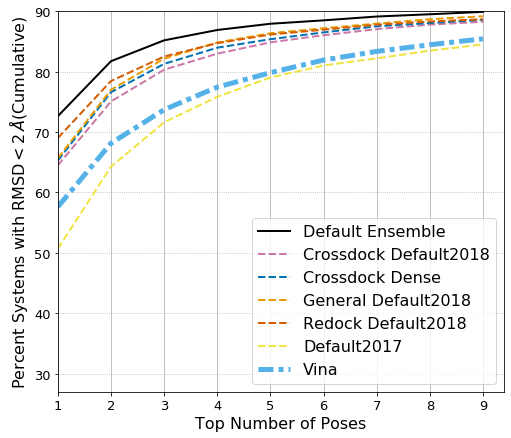

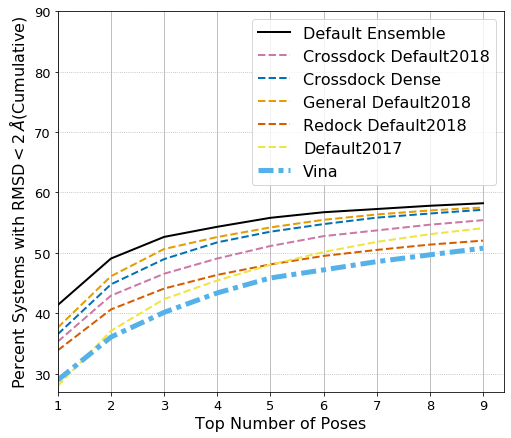

In [9]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [10]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Ensemble models

In [11]:
filename='rescore_ensembles.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

rescore_ensembles_line


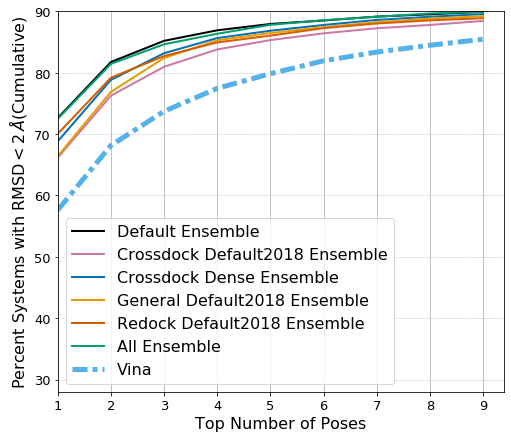

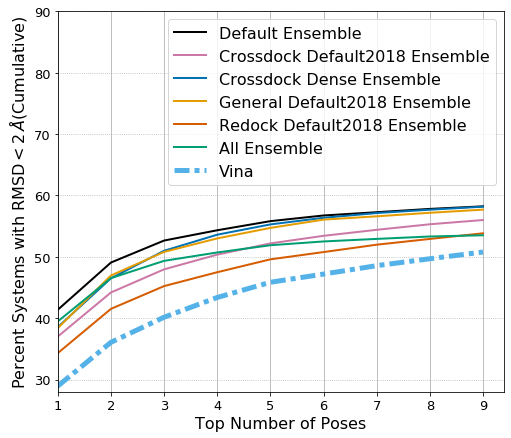

In [12]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [13]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Time Split Single Models - No PDBbind2017 General

In [19]:
filename='single_models_no2017.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

single_models_no2017_line


In [20]:
vina_no17 = plot_df_cd['Vina'].copy()

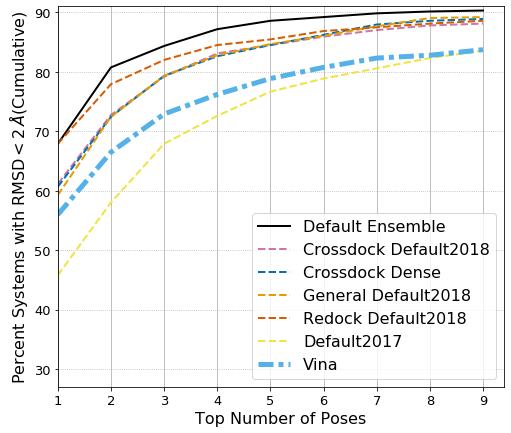

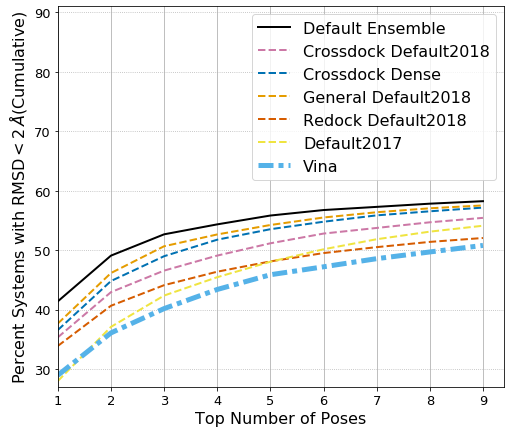

In [15]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [16]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Time Split Ensemble Models - No PDBbind2017 General

In [26]:
filename='ensemble_models_no2017.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

ensemble_models_no2017_line


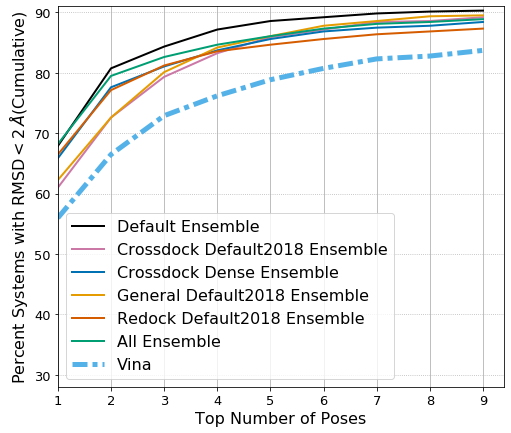

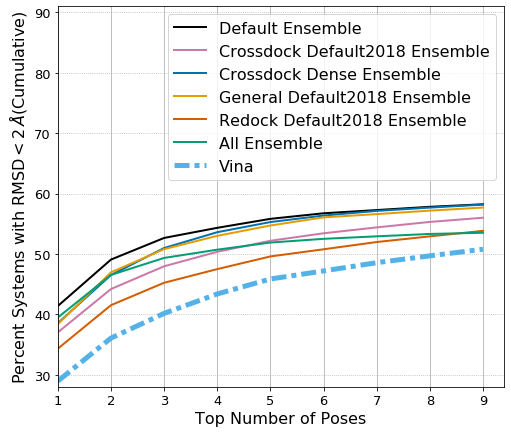

In [27]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [28]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Time Split Single Models - No PDBbind2017 General and No CD2020

In [35]:
filename='single_models_no2017_nocd2020.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

single_models_no2017_nocd2020_line


In [36]:
vina_no17_nocd = plot_df_cd['Vina'].copy()

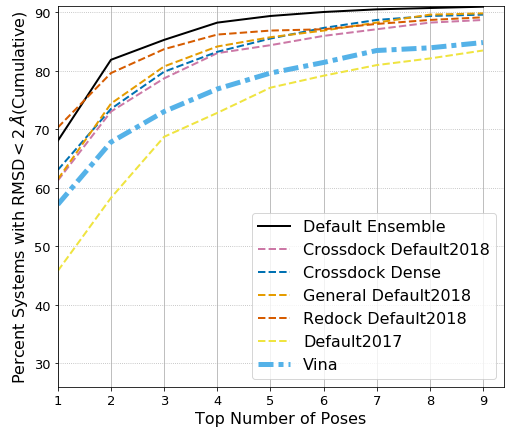

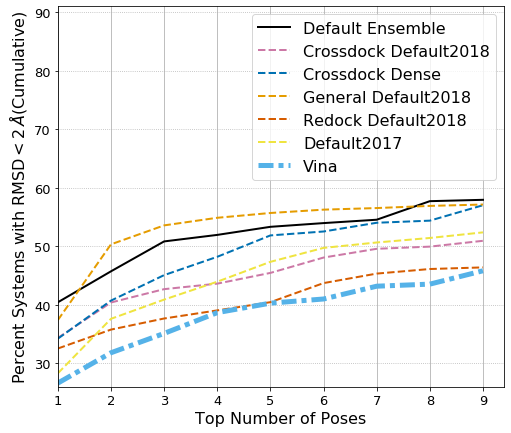

In [30]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [31]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Time Split Ensemble Models - No PDBbind2017 General and No CD2020

In [42]:
filename='ensemble_models_no2017_nocd2020.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

ensemble_models_no2017_nocd2020_line


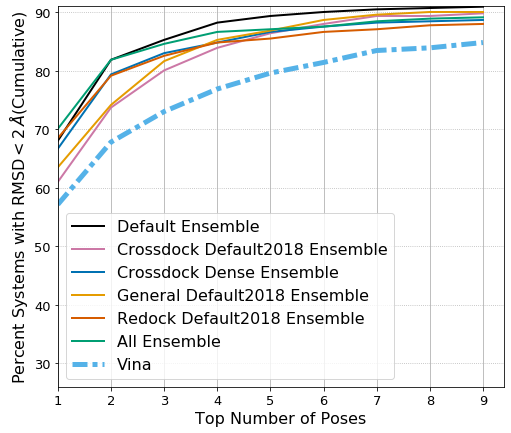

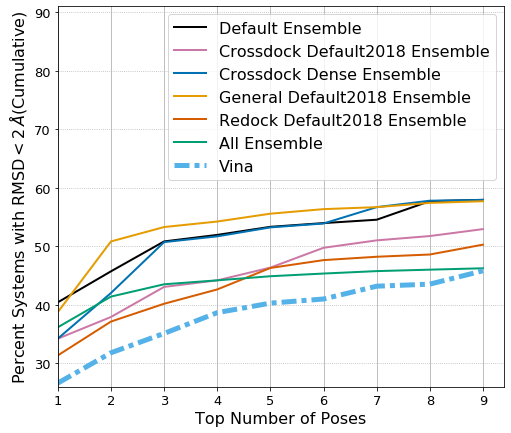

In [44]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [45]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Refinement Results - Single Models

In [46]:
filename='refine_single_models.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
#plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd])

refine_single_models_line


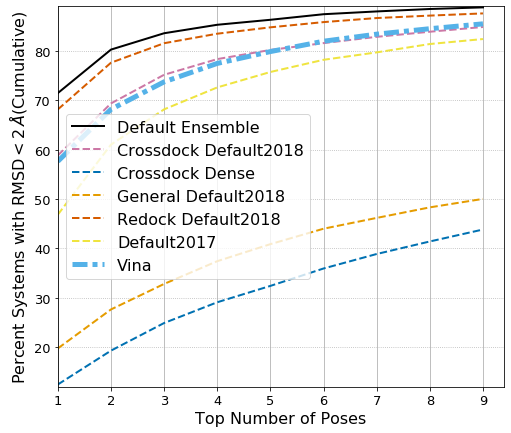

In [47]:
for big_df,data_type in [(plot_df_rd,'redocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [48]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')

### Refinement Results - Ensemble Models

In [49]:
filename='refine_ensembles.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd])

refine_ensembles_line


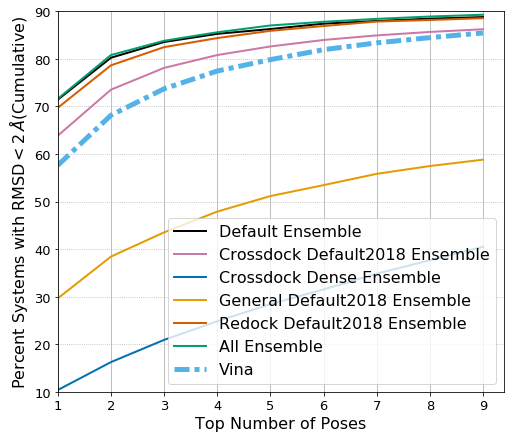

In [50]:
for big_df,data_type in [(plot_df_rd,'redocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [51]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')

### Whole Protein (Default Ensemble vs Vina)
Need CD results for Vina- Paul is working on this

In [77]:
filename='whole_ptn_comparison.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

whole_ptn_comparison_line


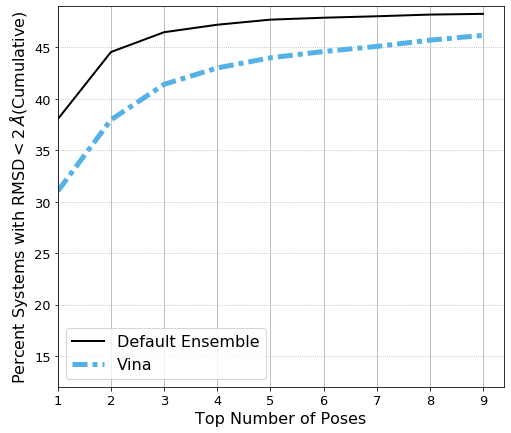

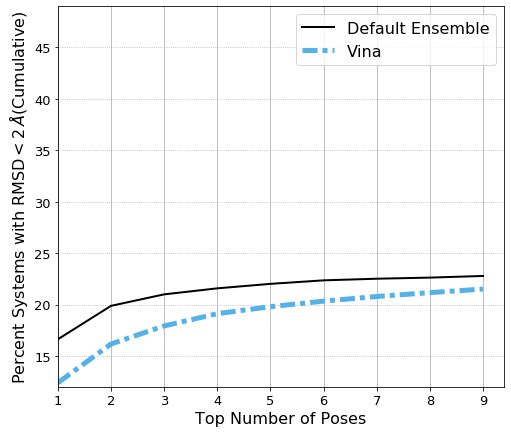

In [78]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [79]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

# Thresholding Graphs
## CNNscore
### Single Models

In [80]:
filename='thresh_cnnscore_single_models.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]
print(figname)

thresh_cnnscore_single_models


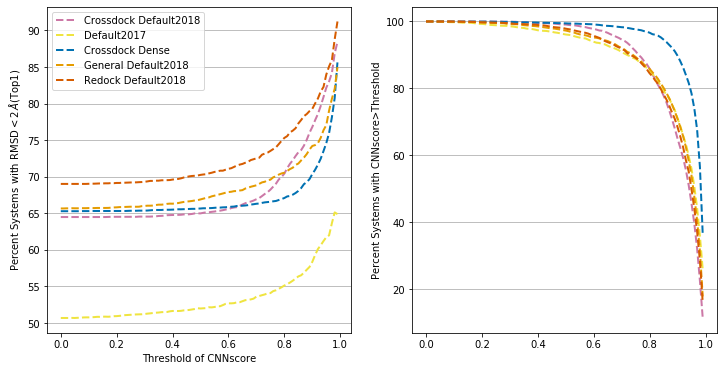

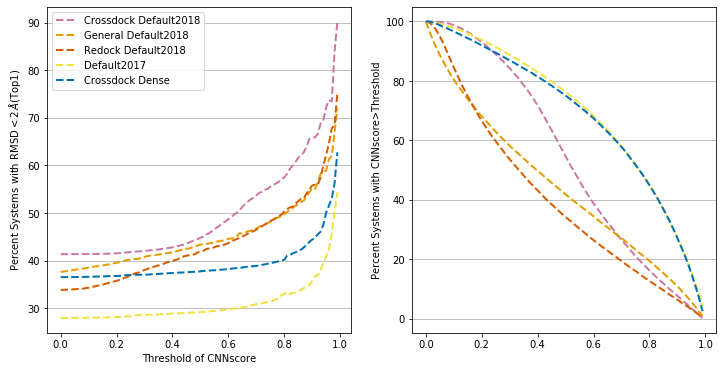

In [81]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=[12,6])
    rang= list(big_df.index)
    for c in [col for col in big_df.columns if 'Good' in col]:
        model = c.replace(' Good','')
        c = color_dict[model.replace(' Ensemble','')]
        ls = get_linestyle(model)
        lw = get_linewidth(model)
        
        ax1.plot(rang,big_df[f'{model} Good'],label=model,color=c,linestyle=ls,linewidth=lw)
        ax2.plot(rang,big_df[f'{model} Left'],label=model,color=c,linestyle=ls,linewidth=lw)
    ax1.set_xlabel('Threshold of CNNscore')
    ax1.grid(b=True,axis='y',which='major')
    ax1.legend()
    ax1.set_ylabel(r'Percent Systems with RMSD$<2\,\AA$(Top1)')
    ax2.set_ylabel('Percent Systems with CNNscore>Threshold')
    # box = ax1.get_position()
    # ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # lgd = plt.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1.15, 0.5))
    #plt.ylim(60,100)
    ax2.grid(b=True,axis='y',which='major')
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [82]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### CNNscore -Ensemble Models

In [83]:
filename='thresh_cnnscore_ensembles.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]
print(figname)

thresh_cnnscore_ensembles


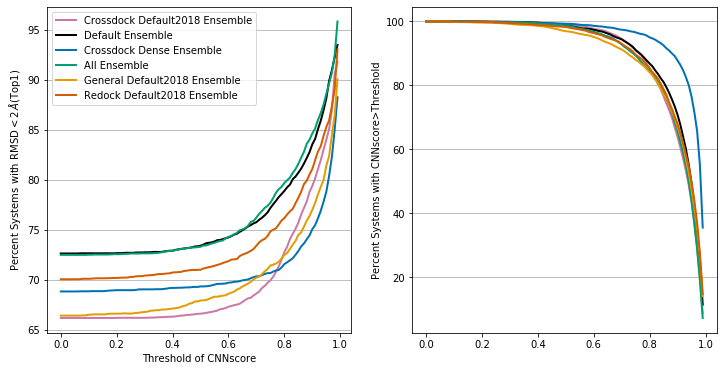

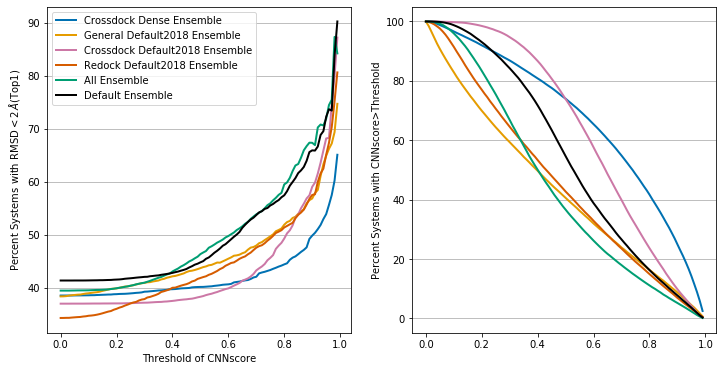

In [84]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=[12,6])
    rang= list(big_df.index)
    for c in [col for col in big_df.columns if 'Good' in col]:
        model = c.replace(' Good','')
        c = color_dict[model.replace(' Ensemble','')]
        ls = get_linestyle(model)
        lw = get_linewidth(model)
        
        ax1.plot(rang,big_df[f'{model} Good'],label=model,color=c,linestyle=ls,linewidth=lw)
        ax2.plot(rang,big_df[f'{model} Left'],label=model,color=c,linestyle=ls,linewidth=lw)
    ax1.set_xlabel('Threshold of CNNscore')
    ax1.grid(b=True,axis='y',which='major')
    ax1.legend()
    ax1.set_ylabel(r'Percent Systems with RMSD$<2\,\AA$(Top1)')
    ax2.set_ylabel('Percent Systems with CNNscore>Threshold')
    # box = ax1.get_position()
    # ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # lgd = plt.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1.15, 0.5))
    #plt.ylim(60,100)
    ax2.grid(b=True,axis='y',which='major')
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [85]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## CNNaffinity
### Single Models

In [91]:
filename='thresh_cnnaffinity_single_models.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]
print(figname)

thresh_cnnaffinity_single_models


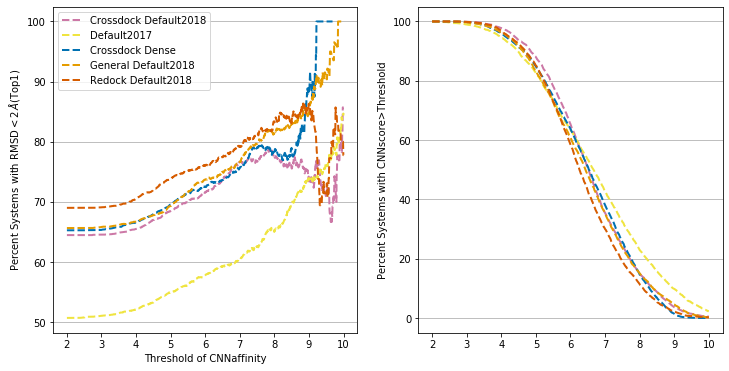

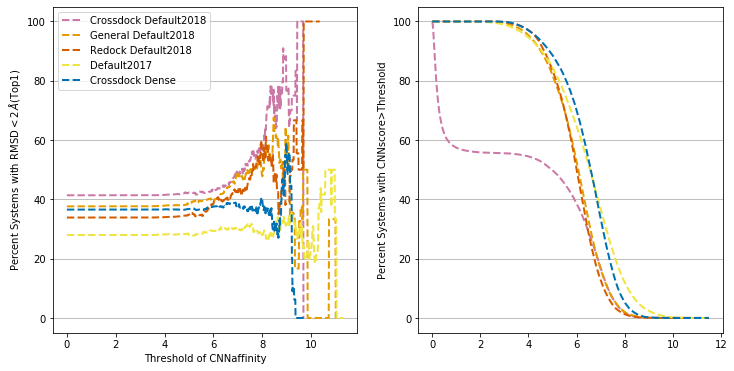

In [94]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=[12,6])
    rang= list(big_df.index)
    for c in [col for col in big_df.columns if 'Good' in col]:
        model = c.replace(' Good','')
        c = color_dict[model.replace(' Ensemble','')]
        ls = get_linestyle(model)
        lw = get_linewidth(model)
        
        ax1.plot(rang,big_df[f'{model} Good'],label=model,color=c,linestyle=ls,linewidth=lw)
        ax2.plot(rang,big_df[f'{model} Left'],label=model,color=c,linestyle=ls,linewidth=lw)
    ax1.set_xlabel('Threshold of CNNaffinity')
    ax1.grid(b=True,axis='y',which='major')
    ax1.legend()
    ax1.set_ylabel(r'Percent Systems with RMSD$<2\,\AA$(Top1)')
    ax2.set_ylabel('Percent Systems with CNNscore>Threshold')
    # box = ax1.get_position()
    # ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # lgd = plt.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1.15, 0.5))
    #plt.ylim(60,100)
    ax2.grid(b=True,axis='y',which='major')
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [95]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### CNNaffinity -Ensemble Models

In [96]:
filename='thresh_cnnaffinity_ensembles.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]
print(figname)

thresh_cnnaffinity_ensembles


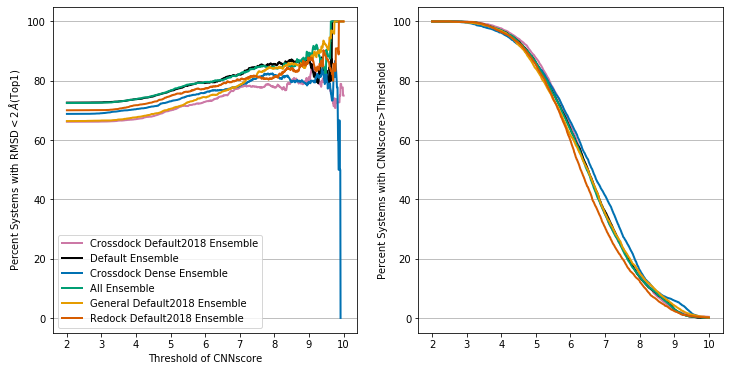

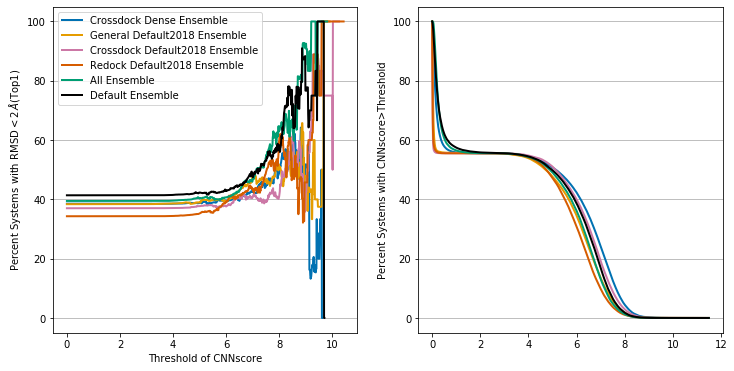

In [97]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=[12,6])
    rang= list(big_df.index)
    for c in [col for col in big_df.columns if 'Good' in col]:
        model = c.replace(' Good','')
        c = color_dict[model.replace(' Ensemble','')]
        ls = get_linestyle(model)
        lw = get_linewidth(model)
        
        ax1.plot(rang,big_df[f'{model} Good'],label=model,color=c,linestyle=ls,linewidth=lw)
        ax2.plot(rang,big_df[f'{model} Left'],label=model,color=c,linestyle=ls,linewidth=lw)
    ax1.set_xlabel('Threshold of CNNscore')
    ax1.grid(b=True,axis='y',which='major')
    ax1.legend()
    ax1.set_ylabel(r'Percent Systems with RMSD$<2\,\AA$(Top1)')
    ax2.set_ylabel('Percent Systems with CNNscore>Threshold')
    # box = ax1.get_position()
    # ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # lgd = plt.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1.15, 0.5))
    #plt.ylim(60,100)
    ax2.grid(b=True,axis='y',which='major')
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [98]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

# For Sweep Figures

In [99]:
def get_linestyle(column_name):
    if 'DefE' in column_name:
        linestyle = '-'
    elif 'Vina' in column_name:
        linestyle = (0, (3, 1, 1, 1))
    return linestyle

## Exhaustiveness

In [100]:
filename='sweep_exhaustiveness.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='4'),
                   Patch(facecolor='g', edgecolor='g',
                         label='8'),
                  Patch(facecolor='r', edgecolor='r',
                         label='16')]
color_dict = {'4':'b','8':'g',
              '16':'r'}

sweep_exhaustiveness_line


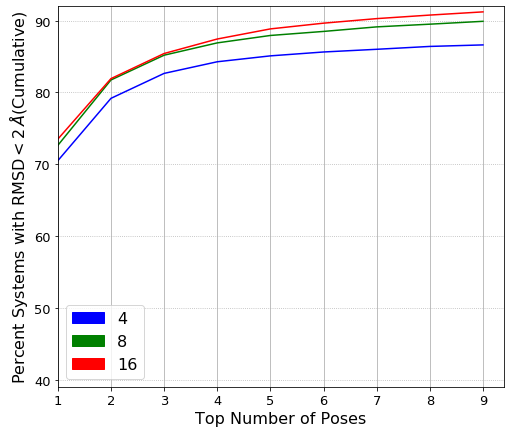

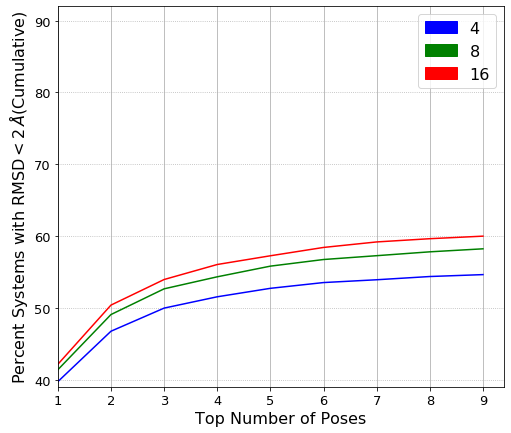

In [101]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col.split('_')[1] not in ['4','8','16']:
            continue
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [102]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Autobox Add

In [103]:
filename='sweep_autobox_add.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='2'),
                  Patch(facecolor='g', edgecolor='g',
                         label='4'),
                  Patch(facecolor='r', edgecolor='r',
                         label='6'),
                  Patch(facecolor='m', edgecolor='m',
                         label='8')]
color_dict = {'2':'b','4':'g',
              '6':'r','8': 'm'}

sweep_autobox_add_line


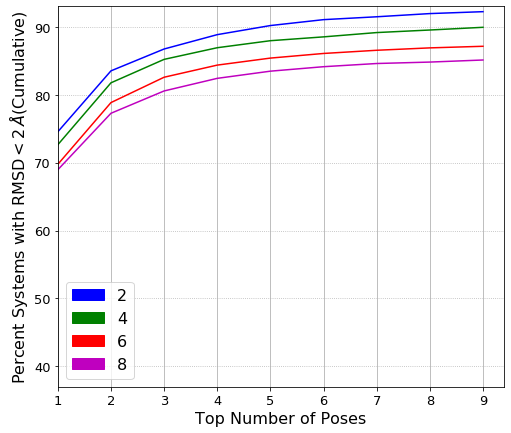

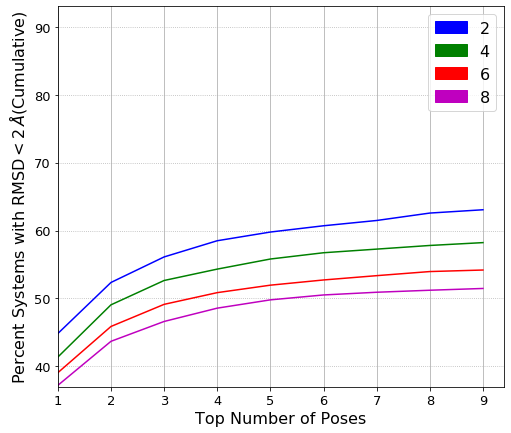

In [104]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [105]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Number MC Saved

In [106]:
filename='sweep_mcsaved.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='20'),
                  Patch(facecolor='g', edgecolor='g',
                         label='40'),
                  Patch(facecolor='r', edgecolor='r',
                         label='60'),
                  Patch(facecolor='m', edgecolor='m',
                         label='80'),
                  Patch(facecolor='orange', edgecolor='orange',
                         label='100'),
                  Patch(facecolor='k', edgecolor='k',
                         label='Default(50)')]
color_dict = {'20':'b','40':'g','60':'r','80': 'm','100':'orange','Default':'k'}

sweep_mcsaved_line


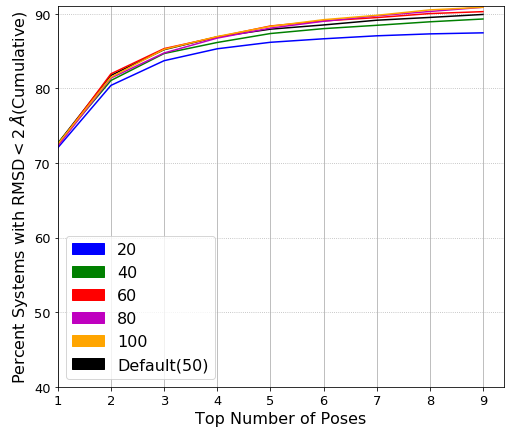

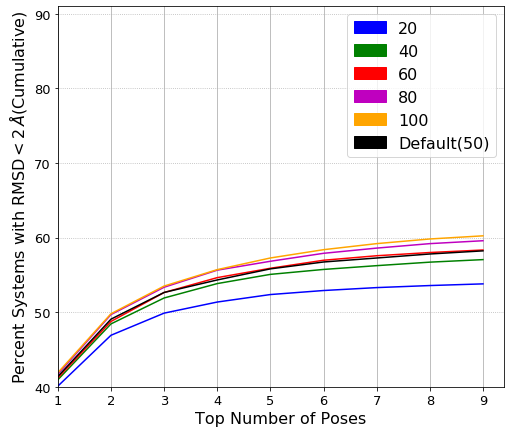

In [107]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [108]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## CNN Rotations

In [109]:
filename='sweep_cnnrot.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='0'),
                  Patch(facecolor='g', edgecolor='g',
                         label='1'),
                  Patch(facecolor='r', edgecolor='r',
                         label='5'),
                  Patch(facecolor='m', edgecolor='m',
                         label='10'),
                  Patch(facecolor='orange', edgecolor='orange',
                         label='20')]
color_dict = {'0':'b','1':'g',
              '5':'r','10': 'm','20':'orange'}

sweep_cnnrot_line


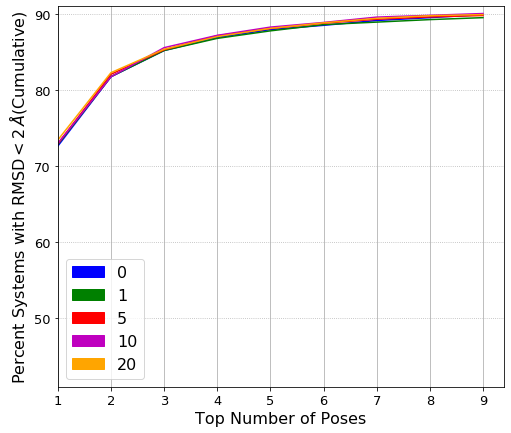

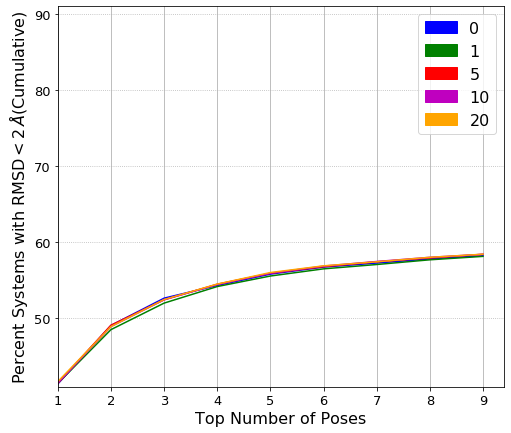

In [110]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [111]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Number of Modes

In [112]:
filename='sweep_num_modes.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='9'),
                  Patch(facecolor='g', edgecolor='g',
                         label='100')]
color_dict = {'9':'b','100':'g'}

sweep_num_modes_line


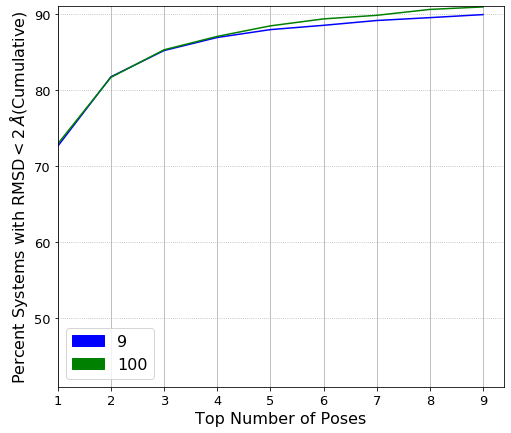

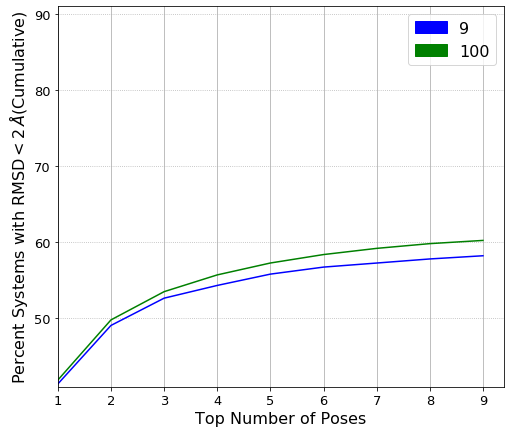

In [113]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [114]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Minimum RMSD Filter

In [115]:
filename='sweep_rmsdf.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='0.5'),
                  Patch(facecolor='g', edgecolor='g',
                         label='1.0'),
                  Patch(facecolor='r', edgecolor='r',
                         label='1.5')]
color_dict = {'0.5':'b','1.0':'g','1.5':'r'}

sweep_rmsdf_line


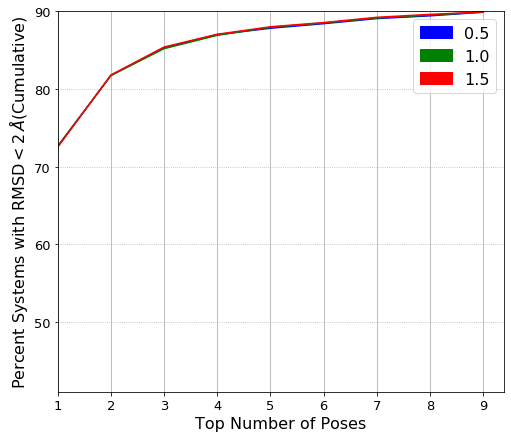

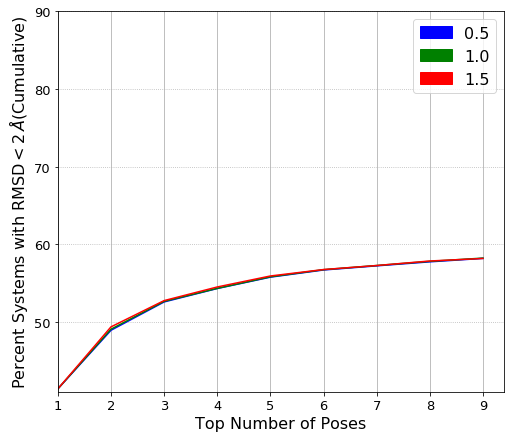

In [116]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [117]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Refinement with CNN Empirical Weight

In [118]:
filename='refine_sweep_cnn_empirical_weight.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='0.01'),
                  Patch(facecolor='g', edgecolor='g',
                         label='0.1'),
                  Patch(facecolor='r', edgecolor='r',
                         label='1'),
                  Patch(facecolor='m', edgecolor='m',
                         label='10'),
                  Patch(facecolor='#55b2e8', edgecolor='#55b2e8',
                         label='Vina')]
color_dict = {'0.01':'b','0.1':'g','1':'r','10': 'm','Vina':'#55b2e8'}

refine_sweep_cnn_empirical_weight_line


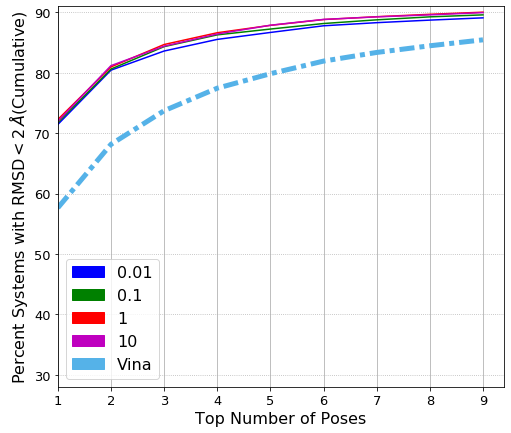

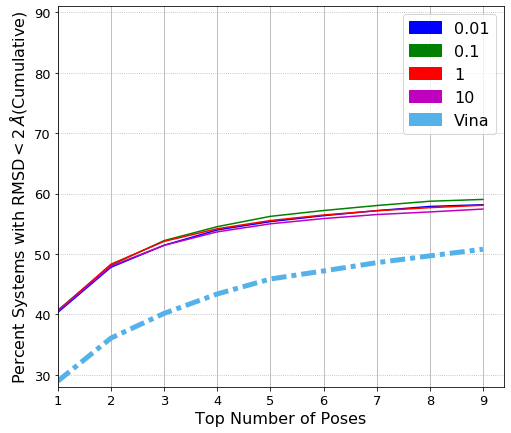

In [119]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [120]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Whole Protein Exhaustiveness

In [121]:
filename='whole_ptn_sweep_exhaustiveness.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='8'),
                  Patch(facecolor='g', edgecolor='g',
                         label='16'),
                  Patch(facecolor='r', edgecolor='r',
                         label='32'),
                  Patch(facecolor='m', edgecolor='m',
                         label='64')]
color_dict = {'8':'b','16':'g','32':'r','64': 'm'}

whole_ptn_sweep_exhaustiveness_line


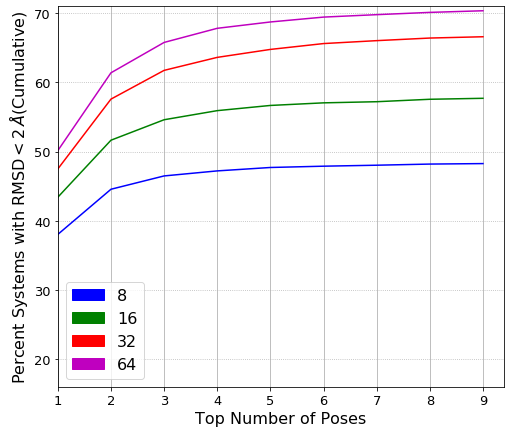

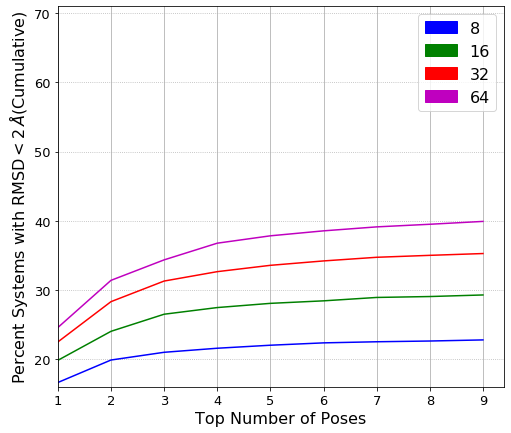

In [122]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [123]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Bar Graph
Not Being used yet

In [78]:
# xlab = 'Pose Number'
# ylab = 'Percent Systems with RMSD<2(Cumulative)'
# figname=args.figname+'_bar'
# print(figname)
# args.annotate_size = 6
# print(args.annotate_size)

final_single_models_bar
6


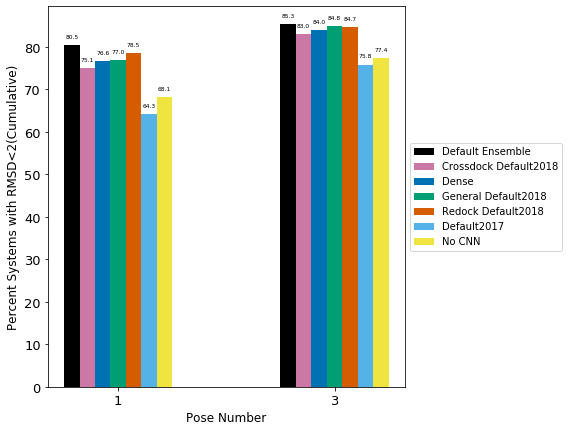

In [79]:
# ax = plt.figure(figsize=[8,7]).gca()
# offset = makeOffset(len(big_df.columns), args.width)
# for i,col in enumerate(big_df.columns):
#     #plot_df = list_of_dataframes[j]
#     bar_info = [big_df[col].iat[p] for p in args.use_pose]
# #     yerr = np.zeros(shape=(2, len(args.use_pose)), dtype=float)
#     c = color_dict[col.split(' ')[0]]
# #     if args.use_bound:  # for showing error bars on the bars to denote the systems below 1 and 3 rmsd for - and + error respectively
# #         for p_idx, pose in enumerate(args.use_pose):
# #             yerr_pos = float(plot_df.iloc[pose-1]['good3'])-float(plot_df.iloc[pose-1]['good2']) 
# #             yerr_neg = float(plot_df.iloc[pose-1]['good2'])-float(plot_df.iloc[pose-1]['good1']) 
# #             yerr[p_idx,:] = [yerr_neg, yerr_pos]
# #     else:
# #         yerr = None
#     rects = ax.bar(np.array(args.use_pose)+offset[i], bar_info, args.width/len(big_df.columns), align='center', label=col, capsize=4,color=c)
#     if args.annotate_size:  # adding annotations to the bars to tell their exact values
#         autolabel(rects, args.annotate_size, ax)
# #prettifyGraph(ax, 'Pose #', 'Percent Good Poses (<2 RMSD)', args.figname+'_bar', bargraph=args.use_pose, ylim=args.y_lim)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_autoscalex_on(True)
# ax.set_xticks(args.use_pose)
# ax.set_autoscaley_on(True)
# ax.tick_params(axis='both', which='major', labelsize=13)
# ax.set_xlabel(xlab,fontsize='large')
# ax.set_ylabel(ylab,fontsize='large')
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(f'/home/anm329/GNINA-1.0/figures/{figname}.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')